# Pathogen Genomics Center of Excellence Situation Report

In [ ]:
var <- "JN.1"
today_date <- Sys.Date()

-   Current data reflects a mixture of JN.1 descendents as the likely near term variants.  
-   Globally no other variants with unusual characteristics have been identified as having unusual growth.
-   Some other point

# Situation Update Details

-   Based on what - XYZ(?), JN.1 and descendents continue to dominate. Some recombinations from JN.1 and other BA.5 variants are being monitoredtracked, but have yet to show significant growth relative other variants.
-   Together this diversity suggests steady evolution against general population immunity with no indications of a variant driven wave of COVID-19 infections.
-   As of 2024-04-30, there were X samples from MM/DD/YYYY - MM/DD/YYYY, some comment on trend
-   Some text here about image one. There is this variant that’s here
-   Some text about image two
-   Image 3 has this
-   Findings from a site’s analysis of national data

``` python
# title = "<b><span style = 'font-size:14pt;'>Statewide COVID-19 Variants: Last 12 Weeks</span></b><br>This chart shows the percent of genetic mutations (or variants) of the COVID-19 virus by lineage for the past 6 weeks. Knowing how the virus is changing and which variants are found helps inform our public health response, which includes developing and recommending effective vaccines and treatments")

# ----- Make Variant Plot ----- #

## ---- var-plot
(
  variants %>%
    ggplot(aes(y=seven_day_percent,
               x=group_label,
               fill=variant,
               label=percent_label)) +
    geom_bar(position="stack", stat="identity") +
    geom_text(
      aes(
        label=ifelse(
          seven_day_percent>4.0,
          percent_label,
          ""
          )
        ),
      size = 3,
      position = position_stack(vjust = 0.5),
      color="white") +
    scale_fill_viridis_d(na.value = "red") +
    # Add percent sign 
    scale_y_continuous(labels = function(x) paste0(x, "%")) +
    labs(
         # Without the caption, the dates get cut off in the email..
         caption = "",
         x = "Specimen Collection Date",
         y = "",
         title = "Statewide COVID-19 Variants: Last 12 Weeks",
         subtitle = "Percent of genetic mutations (or variants) of the COVID-19 virus by lineage for the past 6 weeks."
         ) +
    theme_bw() +
    theme(
      # take out the default background
      strip.background  = element_blank(),
      # Adjust where the legend is an put a sick background behind it
      legend.position = 'right',
      legend.background = element_rect(fill = "lightblue",
                                       linetype = "solid",
                                       color = "darkblue",
                                       linewidth = 1),
      legend.direction = "vertical", legend.box = "horizontal",
      plot.title.position = "plot") +
      # plot.title = element_textbox_simple(
      #   maxwidth = unit(6,"in"),
      #   hjust = .0005,
      #   size = 10,
      #   padding = margin(5.5, 5.5, 5.5, 5.5),
      #   margin = margin(0, 0, 5.5, 0)
      #   # fill = "cornsilk"
      # )) +
    # Again adjust where the legend should be and how it should be labeled
    guides(fill = guide_legend(title = "Variants", 
                               title.position = "top",
                               title.hjust = .5,
                               byrow = TRUE,
                               override.aes = list(size=5.5)),
           size = guide_legend( )) 
)

## ---- stop
```

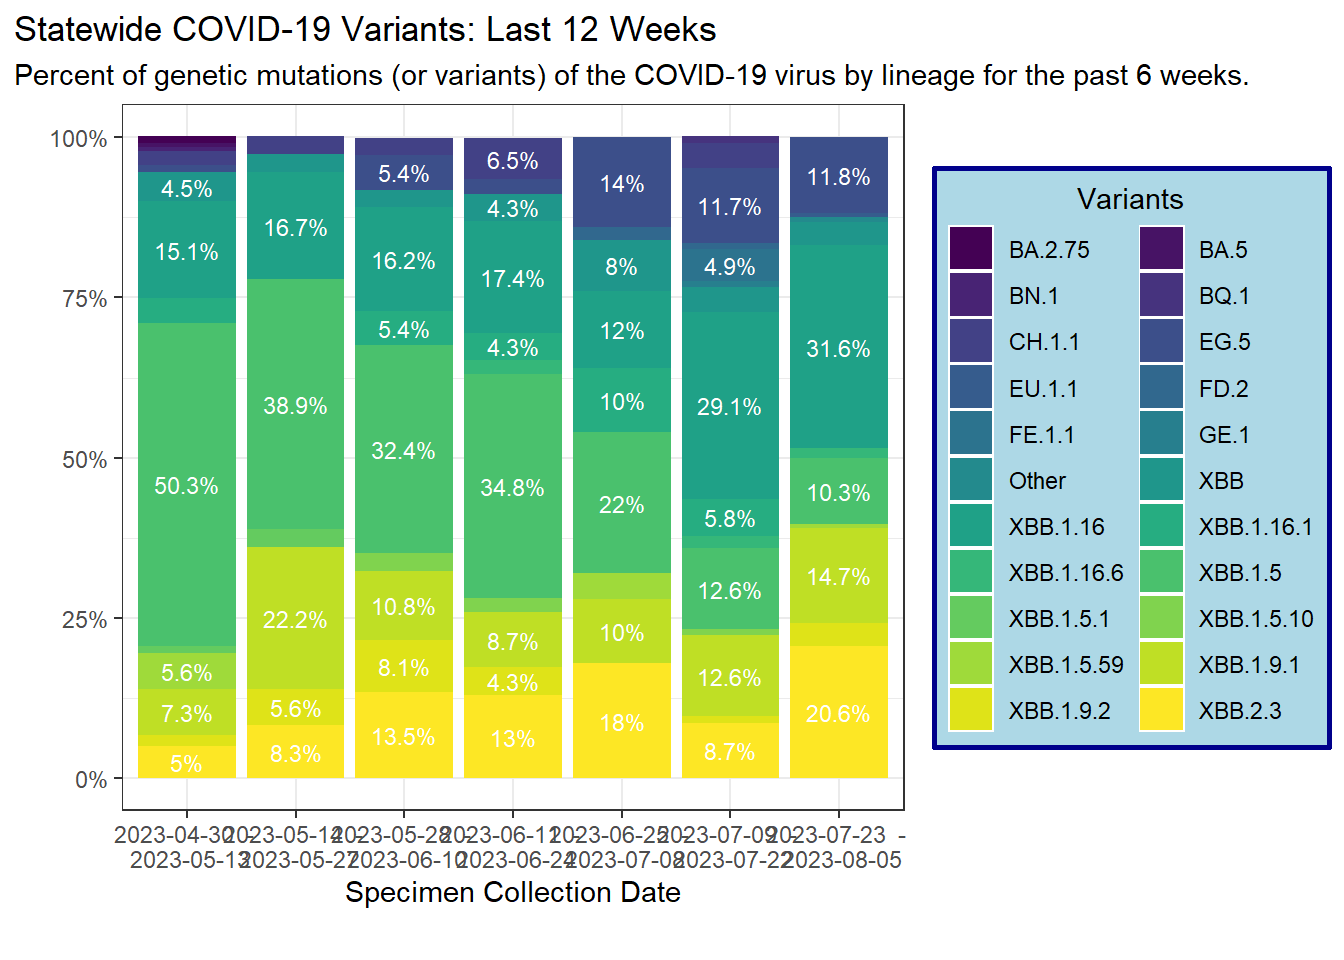

In [ ]:
# Here you can write code that can be used as inline text
# See the variant proportions values below in the summary
# Those values are not hard-coded/written. They will be automatically updated 
# in the text whenever there is new data/a new render

wa_prop <- paste0(50,"%")
ga_prop <- 60
ne_prop <- 50
va_prop <- paste0(60,"%")

-   Washington State Department of Health - highest variant proportion is 50%
-   Georgia Department of Public Health probablity of detection: 60 and the consensus genomes are uploaded to public repositories like GISAID and GenBank.
-   Massachusetts Department of Health prop - 50
-   Virginia Deparment of Health - 60%

``` python
# ------------------------------------------
# state by state analysis

coeff <- 30
state_subset <- c("Washington", "Massachusetts", "Georgia", "Minnesota", "Virginia")

# illustrate selected states
g <- us_states %>%
  filter(state %in% state_subset) %>%
  ggplot(aes(date, cases_7day)) +
  geom_line(color = "orange") +
  facet_wrap(~state, scales = "free") +
  theme(legend.position = "none") +
  geom_line(aes(y = deaths_7day * coeff), color = "red") +
  scale_y_continuous(
    labels = scales::comma,
    name = "Cases",
    sec.axis = sec_axis(deaths_7day ~ . / coeff,
      name = "Deaths",
      labels = scales::comma
    )
  ) +
  theme(
    axis.title.y = element_text(color = "orange", size = 13),
    axis.title.y.right = element_text(color = "red", size = 13)
  ) +
  labs(
    title = "U.S. Cases vs. Deaths",
    subtitle = "7-Day Average",
    caption = "Source: NY Times, Arthur Steinmetz",
    x = "Date"
  )
show(g)
```

    Warning: Removed 7 rows containing missing values or values outside the scale range
    (`geom_line()`).
    Removed 7 rows containing missing values or values outside the scale range
    (`geom_line()`).

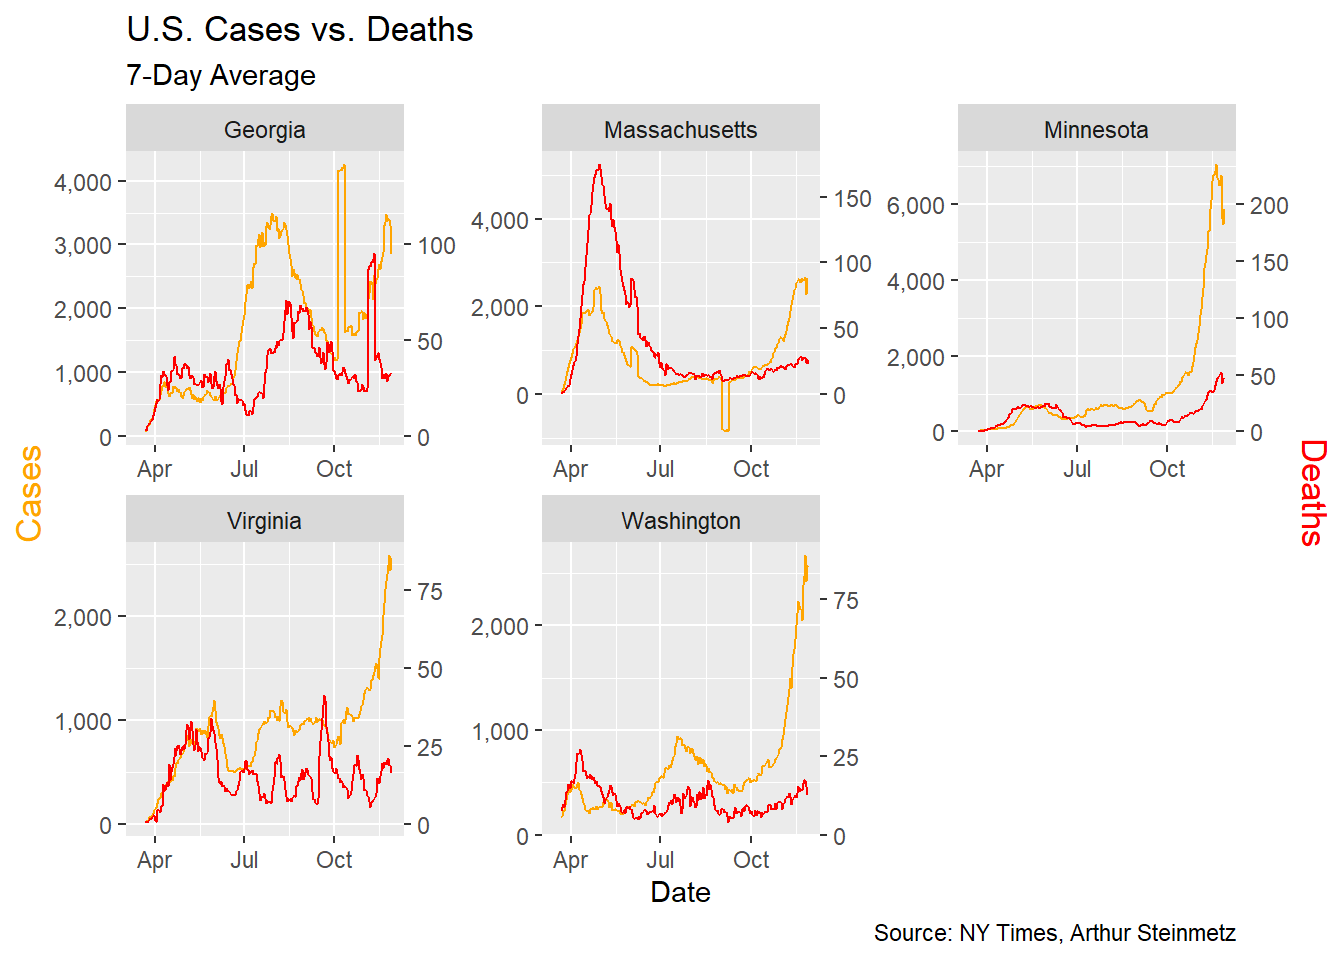

``` python
fatality <- best_fit$data[[1]] %>%
  filter(cases_7day > 0) %>%
  filter(date > as.Date("2020-04-15")) %>%
  mutate(rate = led_deaths / cases_7day)

g <- fatality %>% ggplot(aes(date, rate)) +
  geom_line() +
  geom_smooth() +
  labs(
    x = "Date", y = "Fatality Rate",
    title = "Fatality Rates are Creeping Up",
    subtitle = "Fatality Rate as a Percentage of Lagged Cases",
    caption = "Source: NY Times, Arthur Steinmetz"
  ) +
  scale_y_continuous(labels = scales::percent)
show(g)
```

    `geom_smooth()` using method = 'loess' and formula = 'y ~ x'

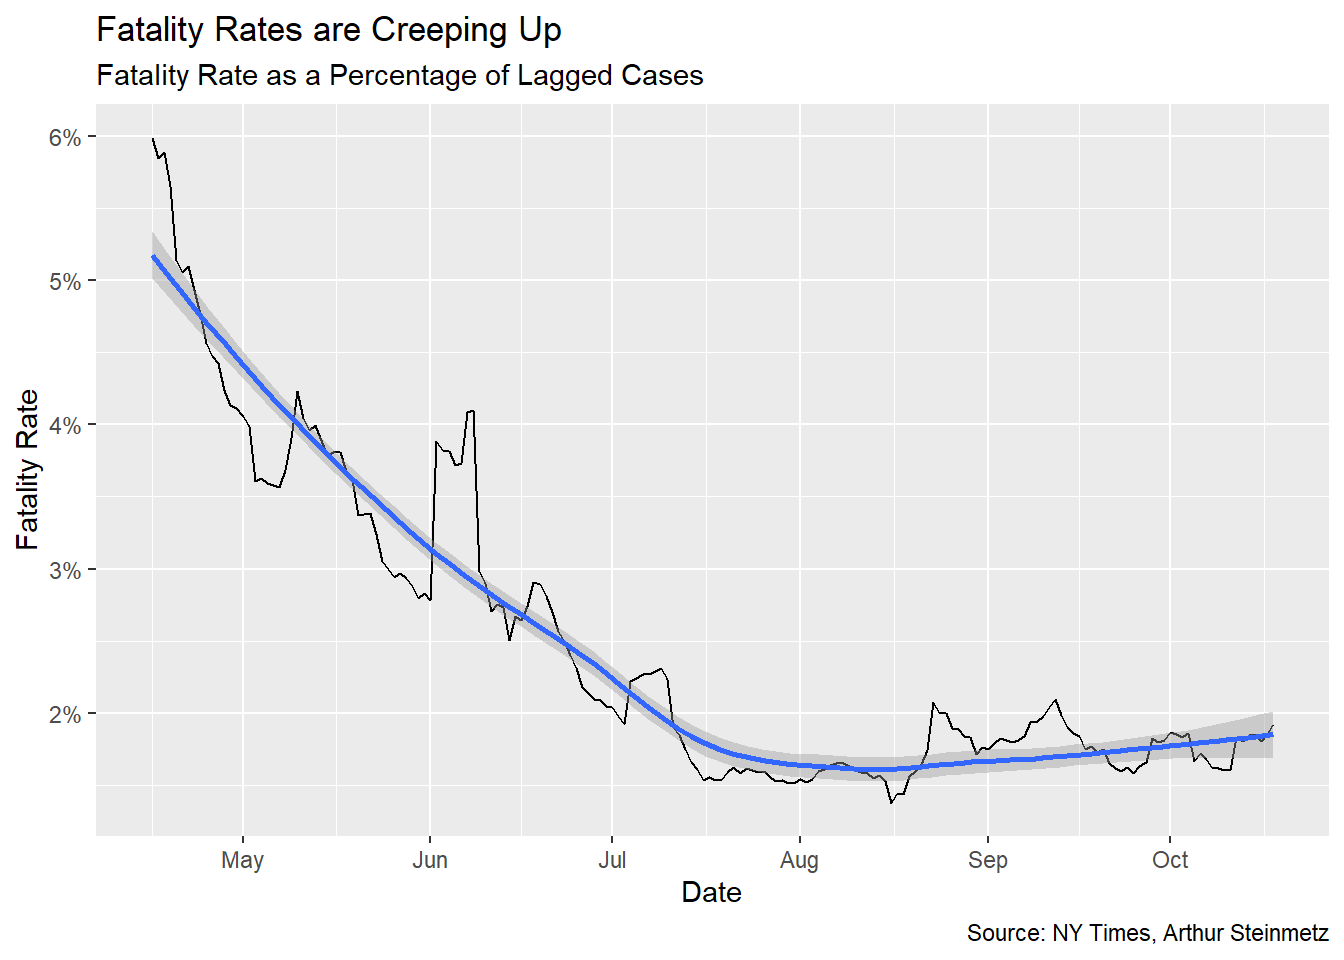

## Citations

This is a simple placeholder for the manuscript’s main document \[@knuth84\].

[@fig-countprop code source](https://coe-test-org.github.io/sitrep-demo/notebooks/nwcoe-preview.html#cell-fig-countprop)

[@fig-state-analysis code source](https://coe-test-org.github.io/sitrep-demo/notebooks/necoe-preview.html#cell-fig-state-analysis)

[@fig-fatality-plot code source](https://coe-test-org.github.io/sitrep-demo/notebooks/vacoe-preview.html#cell-fig-fatality-plot)

[main article code source](https://coe-test-org.github.io/sitrep-demo/index-preview.html)